In [4]:
# Gym stuff
import gym
import gym_anytrading
# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C, PPO

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from trader import trader_agent
import cryptomanager as cm

from config import LOG_PATH, MODEL_PATH
from datetime import datetime
import os
test = trader_agent()

In [ ]:
df = cm.historical_data_df(days_delta=10000)
print(df.dtypes)
df

1995-06-16 00:00:00
date     datetime64[ns, UTC]
Open                 float64
High                 float64
Low                  float64
Close                float64
dtype: object


,date,Open,High,Low,Close
0,2020-04-08 08:09:00+00:00,7314.0,7314.0,7314.0,7314.0
1,2020-04-14 06:31:00+00:00,7101.5,7101.5,7101.5,7101.5
2,2020-04-14 07:55:00+00:00,7100.0,7100.0,7100.0,7100.0
3,2020-04-22 23:29:00+00:00,7118.5,7118.5,7118.5,7118.5
4,2020-04-28 12:28:00+00:00,7748.5,7748.5,7748.5,7748.5
...,...,...,...,...,...
577971,2022-11-02 02:18:00+00:00,20487.0,20487.0,20487.0,20487.0
577972,2022-11-02 02:19:00+00:00,20487.0,20487.0,20486.0,20486.0
577973,2022-11-02 02:20:00+00:00,20486.0,20486.0,20486.0,20486.0
577974,2022-11-02 02:21:00+00:00,20477.0,20477.0,20475.0,20475.0


In [ ]:
window_size = 1000
lower_bound = 5000
# df = pd.read_csv("data/gmedata.csv")
env = gym.make('forex-v0', df=df, frame_bound=(lower_bound,len(df)), window_size=window_size)
df

,date,Open,High,Low,Close
0,2020-04-08 08:09:00+00:00,7314.0,7314.0,7314.0,7314.0
1,2020-04-14 06:31:00+00:00,7101.5,7101.5,7101.5,7101.5
2,2020-04-14 07:55:00+00:00,7100.0,7100.0,7100.0,7100.0
3,2020-04-22 23:29:00+00:00,7118.5,7118.5,7118.5,7118.5
4,2020-04-28 12:28:00+00:00,7748.5,7748.5,7748.5,7748.5
...,...,...,...,...,...
577971,2022-11-02 02:18:00+00:00,20487.0,20487.0,20487.0,20487.0
577972,2022-11-02 02:19:00+00:00,20487.0,20487.0,20486.0,20486.0
577973,2022-11-02 02:20:00+00:00,20486.0,20486.0,20486.0,20486.0
577974,2022-11-02 02:21:00+00:00,20477.0,20477.0,20475.0,20475.0


info {'total_reward': 475845000.0, 'total_profit': 0.9858882723260619, 'position': 1}


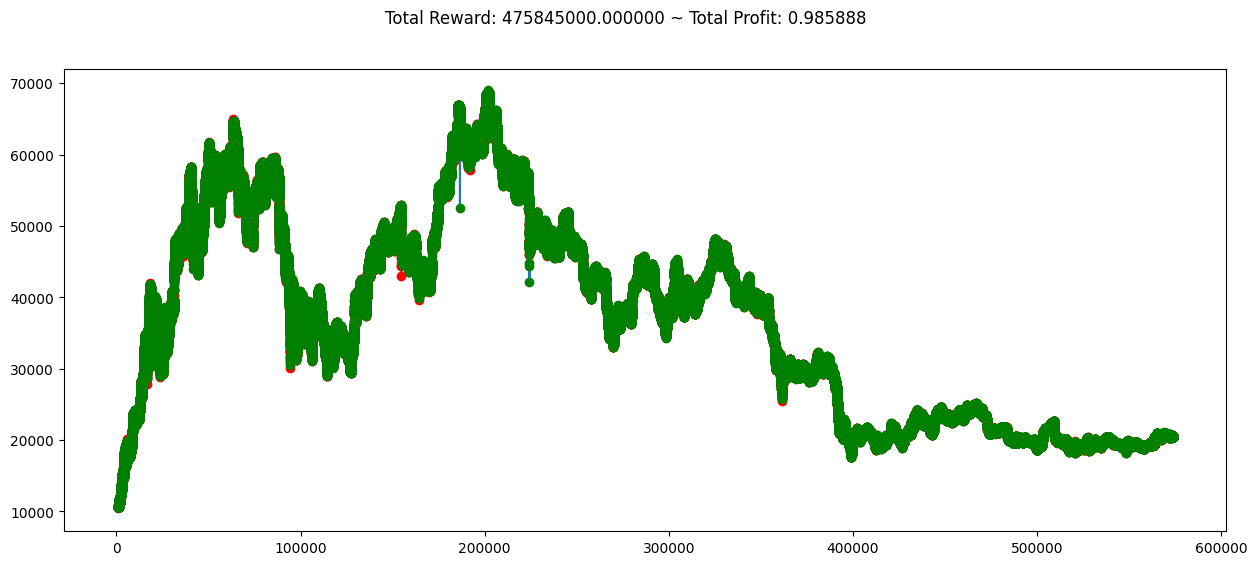

In [ ]:
# Examining the model

state = env.reset()
while True: 
    # add a bit of randomness
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [ ]:
!pip install finta

In [ ]:
from gym_anytrading.envs import StocksEnv, ForexEnv
from finta import TA

In [ ]:
# df['OBV'] = TA.OBV(df)
df['EMA'] = TA.EMA(df, 200)
df['RSI'] = TA.RSI(df)
df.fillna(0, inplace=True)
df = df.join(TA.MACD(df))
df

,date,Open,High,Low,Close,EMA,RSI,MACD,SIGNAL
0,2020-04-08 08:09:00+00:00,7314.0,7314.0,7314.0,7314.0,7314.000000,0.000000,0.000000,0.000000
1,2020-04-14 06:31:00+00:00,7101.5,7101.5,7101.5,7101.5,7207.218750,0.000000,-4.767628,-2.648682
2,2020-04-14 07:55:00+00:00,7100.0,7100.0,7100.0,7100.0,7171.121178,0.000000,-6.121420,-4.071935
3,2020-04-22 23:29:00+00:00,7118.5,7118.5,7118.5,7118.5,7157.767900,9.107921,-5.919194,-4.697701
4,2020-04-28 12:28:00+00:00,7748.5,7748.5,7748.5,7748.5,7278.289003,79.058101,19.384455,2.466196
...,...,...,...,...,...,...,...,...,...
577971,2022-11-02 02:18:00+00:00,20487.0,20487.0,20487.0,20487.0,20487.797737,46.517447,-8.382362,-10.008476
577972,2022-11-02 02:19:00+00:00,20487.0,20487.0,20486.0,20486.0,20487.779849,45.716380,-7.449064,-9.496594
577973,2022-11-02 02:20:00+00:00,20486.0,20486.0,20486.0,20486.0,20487.762139,45.716380,-6.632958,-8.923867
577974,2022-11-02 02:21:00+00:00,20477.0,20477.0,20475.0,20475.0,20487.635152,37.481893,-6.795463,-8.498186


In [ ]:
df.head(15)

,date,Open,High,Low,Close,EMA,RSI,MACD,SIGNAL
0,2020-04-08 08:09:00+00:00,7314.0,7314.0,7314.0,7314.0,7314.000000,0.000000,0.000000,0.000000
1,2020-04-14 06:31:00+00:00,7101.5,7101.5,7101.5,7101.5,7207.218750,0.000000,-4.767628,-2.648682
2,2020-04-14 07:55:00+00:00,7100.0,7100.0,7100.0,7100.0,7171.121178,0.000000,-6.121420,-4.071935
3,2020-04-22 23:29:00+00:00,7118.5,7118.5,7118.5,7118.5,7157.767900,9.107921,-5.919194,-4.697701
4,2020-04-28 12:28:00+00:00,7748.5,7748.5,7748.5,7748.5,7278.289003,79.058101,19.384455,2.466196
5,2020-04-29 03:18:00+00:00,7836.0,7836.0,7836.0,7836.0,7373.580045,81.219889,37.972569,12.090397
6,2020-04-30 12:48:00+00:00,8829.0,8829.0,8829.0,8829.0,7587.786410,91.696109,94.223816,32.876174
7,2020-04-30 12:56:00+00:00,8734.5,8734.5,8734.5,8734.5,7736.192393,86.737276,125.932608,55.239385
8,2020-05-01 00:00:00+00:00,8653.0,8653.0,8653.0,8653.0,7842.181898,82.589058,141.930720,75.265514
9,2020-05-01 05:31:00+00:00,8826.5,8826.5,8826.5,8826.5,7945.101892,84.309425,160.151292,94.284856


In [ ]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low','EMA',"MACD","SIGNAL", 'RSI']].to_numpy()[start:end]
    return prices, signal_features

In [ ]:

class Cypto_Env(ForexEnv):
    _process_data = add_signals
    
env2 = Cypto_Env(df=df, window_size=window_size, frame_bound=(lower_bound,len(df)))

In [ ]:
env2.signal_features

array([[ 7.31400000e+03,  7.31400000e+03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 7.10150000e+03,  7.20721875e+03, -4.76762821e+00,
        -2.64868234e+00,  0.00000000e+00],
       [ 7.10000000e+03,  7.17112118e+03, -6.12141956e+00,
        -4.07193529e+00,  0.00000000e+00],
       ...,
       [ 2.04860000e+04,  2.04877621e+04, -6.63295827e+00,
        -8.92386651e+00,  4.57163798e+01],
       [ 2.04750000e+04,  2.04876352e+04, -6.79546271e+00,
        -8.49818575e+00,  3.74818928e+01],
       [ 2.04750000e+04,  2.04875194e+04, -6.76556775e+00,
        -8.15166215e+00,  3.85652479e+01]])

In [ ]:
df.head()

,date,Open,High,Low,Close,EMA,RSI,MACD,SIGNAL
0,2020-04-08 08:09:00+00:00,7314.0,7314.0,7314.0,7314.0,7314.000000,0.000000,0.000000,0.000000
1,2020-04-14 06:31:00+00:00,7101.5,7101.5,7101.5,7101.5,7207.218750,0.000000,-4.767628,-2.648682
2,2020-04-14 07:55:00+00:00,7100.0,7100.0,7100.0,7100.0,7171.121178,0.000000,-6.121420,-4.071935
3,2020-04-22 23:29:00+00:00,7118.5,7118.5,7118.5,7118.5,7157.767900,9.107921,-5.919194,-4.697701
4,2020-04-28 12:28:00+00:00,7748.5,7748.5,7748.5,7748.5,7278.289003,79.058101,19.384455,2.466196


In [ ]:

 
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [ ]:
from config import LOG_PATH, MODEL_PATH
from datetime import datetime
import os
 
model = A2C('MlpPolicy', env, verbose=1, tensorboard_log=LOG_PATH, device="cuda") 

# model = A2C.load(path=os.path.join("data","model","2022-01-11-19-26-1.zip"),env=env, device="auto")
name = str(datetime.now().strftime("%Y-%d-%m-%H-%M") )
print(name)
episodes = 1
step_count = 100000
for i in range (episodes):
    model.learn(total_timesteps=step_count, tb_log_name=f"A2C-{name}")
    # model.save(f"{os.path.join(MODEL_PATH , name)}-{i + 1}.zip")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
2022-01-11-22-28
Logging to ./data\log\A2C-2022-01-11-22-28_1
-------------------------------------
| time/                 |           |
|    fps                | 336       |
|    iterations         | 100       |
|    time_elapsed       | 1         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -0.691    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | -2.92e+05 |
|    value_loss         | 2.43e+11  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 328       |
|    iterations         | 200       |
|    time_elapsed       | 3         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -0.692    |
|    exp

In [ ]:
from datetime import timedelta
from trader import trader_agent
import time
import os
trade_me = trader_agent()
prev_min = 0
from IPython.display import clear_output

In [ ]:
# model.load(os.path.join(MODEL_PATH, "2022-01-11-21-49-18.zip") , env = env)

env = Cypto_Env(df=df, window_size=window_size, frame_bound=(len(df)-lower_bound,len(df)))
obs = env.reset()
while True: 
    try:
        obs = obs[np.newaxis, ...]
        action, _states = model.predict(obs)
        obs, rewards, done, info = env.step(action)
        cur_min = datetime.now().minute
        print(action)
        clear_output()
        if done:
            clear_output()
            

            
            next_df = cm.historical_data_df()
            next_df = next_df.loc[-100:]
            next_df['EMA'] = TA.EMA(next_df, 200)
            prev_min = cur_min
            next_df['RSI'] = TA.RSI(next_df)
            next_df.fillna(0, inplace=True)
            next_df = next_df.join(TA.MACD(next_df))
            df = pd.concat([df, next_df])
            
            print(action[0])

            if action == 1 or action[0] == 1:
                trade_me.buy_position_at_market("BTC/USD")
                print("b") 
                print(df["Low"].tail(1))
            if action == 0 or action[0] == 0:
                trade_me.sell_position_market("BTCUSD")
                print("s")
                print(df["Low"].tail(1))
            plt.figure(figsize=(10,6))
            plt.cla()
            env.render_all()
            plt.show()
            print("info", info)
            obs = env.reset()
            env.df = df
            env.frame_bound=(len(df)-lower_bound,len(df))
            td = timedelta(seconds= 60 - datetime.now().second) 

            print("waiting for the remainder of the minute")
            time.sleep(td.total_seconds())

    except Exception as e:
        print(e)
        break


# cur_min = datetime.now().minute

# td = timedelta(seconds= 60 - datetime.now().second) 
# # while True:
# print(td.total_seconds())
#     # if cur_min > prev_min:
#     #     prev_min = cur_min

Error: Unexpected observation shape (1, 1000, 5) for Box environment, please use (12, 5) or (n_env, 12, 5) for the observation shape.


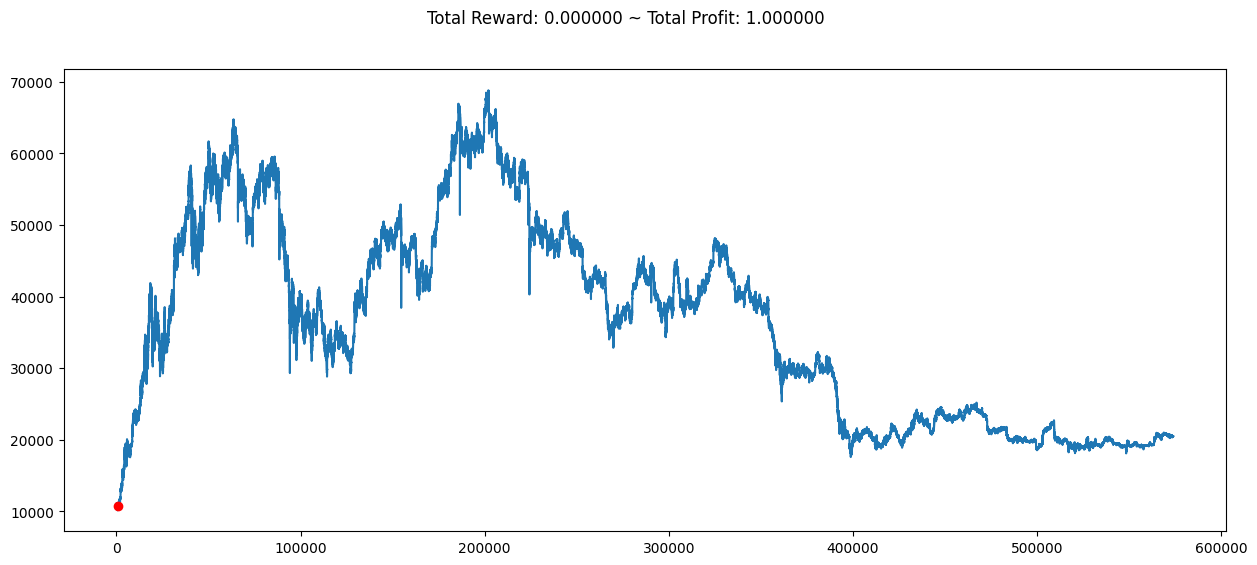

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()